In [27]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
%matplotlib inline
import matplotlib.pyplot as plt


file_path ="Restaurant_and_Market_Health_Violations.csv"
rest_csv = pd.read_csv(file_path)
# rest_csv.count()

In [5]:
rest_csv.head()

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
0,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF030
1,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF027
2,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF035
3,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF033
4,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF029


In [6]:
restaurant = rest_csv[rest_csv.pe_description.str.contains('RESTAURANT')]
restaurant.pe_description.unique()

array(['RESTAURANT (31-60) SEATS HIGH RISK',
       'RESTAURANT (31-60) SEATS MODERATE RISK',
       'RESTAURANT (0-30) SEATS MODERATE RISK',
       'RESTAURANT (0-30) SEATS HIGH RISK',
       'RESTAURANT (61-150) SEATS HIGH RISK',
       'RESTAURANT (61-150) SEATS MODERATE RISK',
       'RESTAURANT (0-30) SEATS LOW RISK',
       'RESTAURANT (31-60) SEATS LOW RISK',
       'RESTAURANT (151 + ) SEATS HIGH RISK',
       'RESTAURANT (151 + ) SEATS MODERATE RISK',
       'RESTAURANT (61-150) SEATS LOW RISK',
       'RESTAURANT (151 + ) SEATS LOW RISK'], dtype=object)

In [7]:
restaurant.head()

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,...,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
0,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF030
1,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF027
2,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF035
3,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF033
4,DA08R0TCU,03/30/2018 12:00:00 AM,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,...,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF029


In [8]:
restaurant_datetime = restaurant[["activity_date","facility_name","violation_code"]]

In [9]:
restaurant_datetime["Month"]=restaurant_datetime['activity_date'].str[:2]

/Users/Allih/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
month_ct = restaurant_datetime.Month.value_counts()

In [11]:
month_df = pd.DataFrame(month_ct).sort_index()
month_df.reset_index(level = 0, inplace = True)
month_df.columns=["Month","Month_Count"]
month_df

,Month,Month_Count
0,01,22283
1,02,21407
2,03,25482
3,04,24657
4,05,25074
5,06,26213
6,07,20917
7,08,15652
8,09,14724
9,10,23699


In [12]:
#10/2015-07/2018
month_df["Average"] = np.where((month_df["Month"]=="08")|(month_df["Month"]=="09"),month_df["Month_Count"]/2, month_df["Month_Count"]/3)
month_df["Average"] = month_df["Average"].round(decimals=2)
month_df

,Month,Month_Count,Average
0,01,22283,7427.67
1,02,21407,7135.67
2,03,25482,8494.00
3,04,24657,8219.00
4,05,25074,8358.00
5,06,26213,8737.67
6,07,20917,6972.33
7,08,15652,7826.00
8,09,14724,7362.00
9,10,23699,7899.67


In [13]:
#10/2015-07/2018
month_df["Average"] = np.where((month_df["Month"]=="08")|(month_df["Month"]=="09"),month_df["Month_Count"]/2, month_df["Month_Count"]/3)
month_df["Average"] = month_df["Average"].round(decimals=2)
month_df.T
save_csv = month_df.to_csv("month_data.csv")

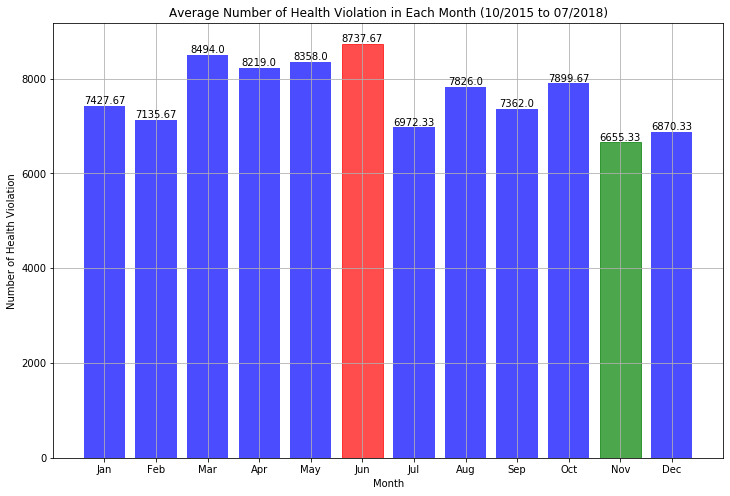

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

bar_x = np.arange(len(month_df["Month"]))
bar_height = month_df["Average"]
bar_tick_label = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
bar_label = month_df["Average"]

bar_plot = plt.bar(bar_x,bar_height,color='b', align="center",tick_label=bar_tick_label,width=0.8,alpha = 0.7)

def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, 1*height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)
autolabel(bar_plot)

plt.title("Average Number of Health Violation in Each Month (10/2015 to 07/2018)")
plt.xlabel("Month")
plt.ylabel("Number of Health Violation")
bar_plot[5].set_color('r')
bar_plot[10].set_color('g')
plt.grid()
plt.savefig("month_violation.jpg",dpi=1200)
plt.show()

In [14]:
restseatingdf = restaurant.groupby(['pe_description'])\
                .count()\
                .reset_index()
restseatingdf



,pe_description,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,...,owner_id,owner_name,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
0,RESTAURANT (0-30) SEATS HIGH RISK,80481,80481,80481,80481,80481,80481,80481,80461,80481,...,80481,80481,80481,80463,80481,80481,80481,80481,80481,80481
1,RESTAURANT (0-30) SEATS LOW RISK,5588,5588,5588,5588,5588,5588,5588,5588,5588,...,5588,5588,5588,5588,5588,5588,5588,5588,5588,5588
2,RESTAURANT (0-30) SEATS MODERATE RISK,44559,44559,44559,44559,44559,44559,44559,44559,44559,...,44559,44559,44559,44540,44559,44559,44559,44559,44559,44559
3,RESTAURANT (151 + ) SEATS HIGH RISK,14023,14023,14023,14023,14023,14023,14023,14023,14023,...,14023,14023,14023,14019,14023,14023,14023,14023,14023,14023
4,RESTAURANT (151 + ) SEATS LOW RISK,313,313,313,313,313,313,313,313,313,...,313,313,313,313,313,313,313,313,313,313
5,RESTAURANT (151 + ) SEATS MODERATE RISK,1090,1090,1090,1090,1090,1090,1090,1090,1090,...,1090,1090,1090,1090,1090,1090,1090,1090,1090,1090
6,RESTAURANT (31-60) SEATS HIGH RISK,57078,57078,57078,57078,57078,57078,57078,57041,57078,...,57078,57078,57078,57065,57078,57078,57078,57078,57078,57078
7,RESTAURANT (31-60) SEATS LOW RISK,1934,1934,1934,1934,1934,1934,1934,1934,1934,...,1934,1934,1934,1929,1934,1934,1934,1934,1934,1934
8,RESTAURANT (31-60) SEATS MODERATE RISK,7869,7869,7869,7869,7869,7869,7869,7869,7869,...,7869,7869,7869,7869,7869,7869,7869,7869,7869,7869
9,RESTAURANT (61-150) SEATS HIGH RISK,42471,42471,42471,42471,42471,42471,42471,42471,42471,...,42471,42471,42471,42447,42471,42471,42471,42471,42471,42471


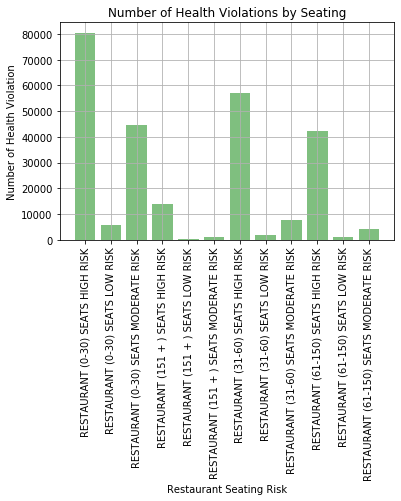

In [15]:
plt.bar(restseatingdf["pe_description"], restseatingdf["violation_code"], color='g', alpha=0.5, align="center")
plt.title("Number of Health Violations by Seating")
plt.xlabel("Restaurant Seating Risk")
plt.ylabel("Number of Health Violation")
plt.xticks(restseatingdf["pe_description"], rotation="vertical")
plt.grid()

In [16]:
restseatavgdf = restaurant.groupby(['pe_description'])\
                .mean()\
                .reset_index()
restseatavgdf

,pe_description,points,program_element_pe,score,service_code
0,RESTAURANT (0-30) SEATS HIGH RISK,1.348728,1631.989302,90.955170,7.207676
1,RESTAURANT (0-30) SEATS LOW RISK,1.311560,1630.012527,93.609520,5.294918
2,RESTAURANT (0-30) SEATS MODERATE RISK,1.330887,1630.997015,92.114926,6.466909
3,RESTAURANT (151 + ) SEATS HIGH RISK,1.335306,1640.990230,91.270128,14.378022
4,RESTAURANT (151 + ) SEATS LOW RISK,1.274760,1639.000000,94.220447,1.000000
5,RESTAURANT (151 + ) SEATS MODERATE RISK,1.315596,1640.003670,92.758716,8.706422
6,RESTAURANT (31-60) SEATS HIGH RISK,1.330180,1634.996479,90.947545,8.918988
7,RESTAURANT (31-60) SEATS LOW RISK,1.326784,1633.043433,93.290589,4.929679
8,RESTAURANT (31-60) SEATS MODERATE RISK,1.313127,1634.006989,92.461431,10.353158
9,RESTAURANT (61-150) SEATS HIGH RISK,1.334558,1637.996515,90.868546,12.339502


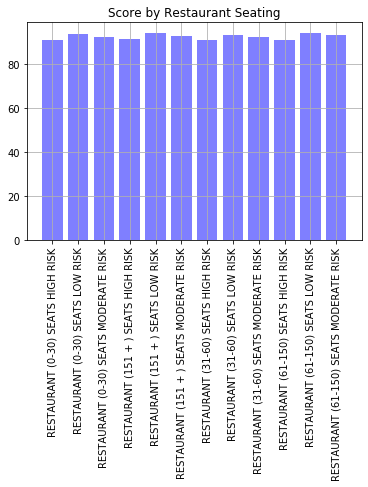

In [17]:
plt.bar(restseatavgdf["pe_description"], restseatavgdf['score'], color='b',alpha=.5, align='center')
plt.title('Score by Restaurant Seating')
plt.xticks(restseatingdf["pe_description"], rotation="vertical")
plt.grid()

In [19]:
restseatdf=pd.DataFrame(restaurant[["pe_description","score", "violation_code"]])
restseatdf["size"],restseatdf["risk"]=restseatdf['pe_description'].str.split("SEATS",2).str
restseatdf.head()

,pe_description,score,violation_code,size,risk
0,RESTAURANT (31-60) SEATS HIGH RISK,92,F030,RESTAURANT (31-60),HIGH RISK
1,RESTAURANT (31-60) SEATS HIGH RISK,92,F027,RESTAURANT (31-60),HIGH RISK
2,RESTAURANT (31-60) SEATS HIGH RISK,92,F035,RESTAURANT (31-60),HIGH RISK
3,RESTAURANT (31-60) SEATS HIGH RISK,92,F033,RESTAURANT (31-60),HIGH RISK
4,RESTAURANT (31-60) SEATS HIGH RISK,92,F029,RESTAURANT (31-60),HIGH RISK


In [20]:
rseatavgdf = restseatdf.groupby(['size'])\
                .mean()\
                .reset_index()
rseatavgdf

,size,score
0,RESTAURANT (0-30),91.464326
1,RESTAURANT (151 + ),91.435174
2,RESTAURANT (31-60),91.193418
3,RESTAURANT (61-150),91.141152


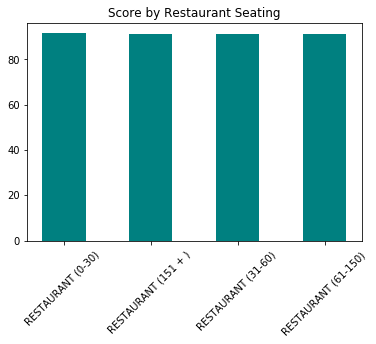

<Figure size 432x288 with 0 Axes>

In [21]:
plt.bar(rseatavgdf["size"], rseatavgdf["score"], color='teal', width =.5)
plt.title('Score by Restaurant Seating')
plt.xticks(rseatavgdf["size"], rotation=45)
plt.show()
plt.savefig('ScorebyRestaurant.png')

In [22]:
restviodf = restseatdf.groupby(['size'])\
                .count()\
                .reset_index()
restviodf

,size,pe_description,score,violation_code,risk
0,RESTAURANT (0-30),130628,130628,130628,130628
1,RESTAURANT (151 + ),15426,15426,15426,15426
2,RESTAURANT (31-60),66881,66881,66881,66881
3,RESTAURANT (61-150),47750,47750,47750,47750


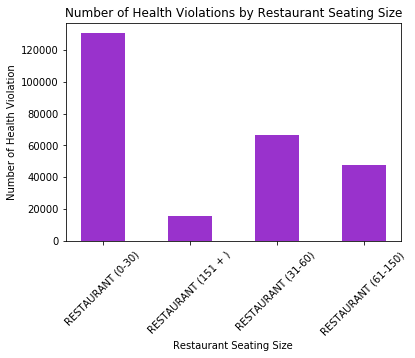

<Figure size 432x288 with 0 Axes>

In [23]:
plt.bar(restviodf["size"], restviodf["violation_code"], color='darkorchid', width=.5)
plt.title("Number of Health Violations by Restaurant Seating Size")
plt.xlabel("Restaurant Seating Size")
plt.ylabel("Number of Health Violation")
plt.xticks(restviodf["size"], rotation=45)
plt.show()
plt.savefig('NumberofHealthViolation.png')

In [31]:
rest_csv["restaurant"]=rest_csv.pe_description.str.contains("RESTAURANT")
data_filter=rest_csv[rest_csv["restaurant"]==True]
data2=data_filter
data2["scale"],data2["risk"]=data2["pe_description"].str.split('SEATS', 2).str
data2["risk"]=data2["risk"].str.lstrip()

/Users/Allih/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/Allih/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [32]:
data2["activity_date"]=data2.activity_date.str.replace('AM', '')
data2["activity_date"]=data2.activity_date.str.replace('PM', '')
data2['activity_date']= pd.to_datetime(data2["activity_date"]) 

/Users/Allih/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/Allih/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/Allih/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

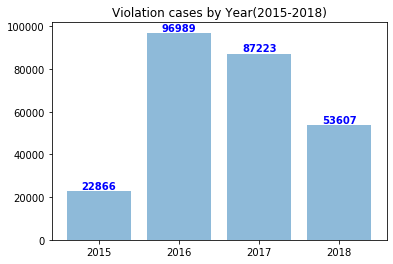

In [35]:
df_violation=data2.filter(["activity_date","violation_code","facility_name"])
df_violation["Year"]=df_violation["activity_date"].dt.year
df_violation["Month"]=df_violation["activity_date"].dt.month
df_year=df_violation.groupby("Year")
gdf0=pd.DataFrame(df_year["violation_code"].count())
gdf0.reset_index(level = None, inplace = True)
gdf0=gdf0.rename(columns={'violation_code': 'violation_number'})
bars=gdf0.Year
y_pos = np.arange(len(bars))
rects1=plt.bar(y_pos, gdf0.violation_number,align='center', alpha=0.5)
plt.xticks(y_pos, bars)
plt.title("Violation cases by Year(2015-2018)")

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1*height,
                '%d' % int(height), color='blue',fontweight='bold',
                ha='center', va='bottom')

autolabel(rects1)

plt.savefig("Violation cases by Year (2015-2018).png", dpi=300, format='png')

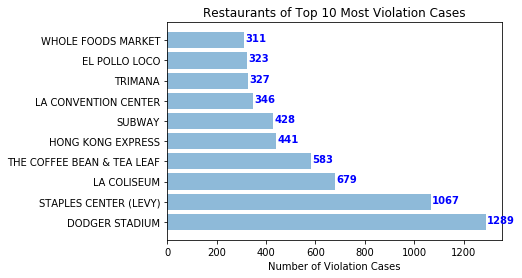

In [36]:
df_facility=df_violation.groupby("facility_name")
gdf1=pd.DataFrame(df_facility["violation_code"].count()).sort_values(by=["violation_code"],ascending=False).head(10)
gdf1.reset_index(level = None, inplace = True)
gdf2=gdf1.rename(columns={'violation_code': 'violation_count'})
fig, ax = plt.subplots()
rects1 = ax.barh(gdf2.facility_name, gdf2.violation_count, align='center', alpha=0.5)
ax.set_title('Restaurants of Top 10 Most Violation Cases')
ax.set_xlabel("Number of Violation Cases")
plt.rcParams["figure.figsize"] = [14,8]

for i, v in enumerate(gdf2.violation_count):
    ax.text(v + 5, i -0.05, str(v), color='blue', fontweight='bold',size=10)
    
plt.savefig("Restaurants of Violation cases.png", dpi=300, format='png', bbox_inches='tight') 

In [37]:
data4=data2.filter(["violation_code","facility_name","risk"])
df4=data4.groupby(["facility_name","risk"])
gdf4=pd.DataFrame(df4["violation_code"].count()).sort_values(by=["violation_code"],ascending=False)
gdf4.reset_index(level = None, inplace = True)
gdf4=gdf4.rename(columns={'violation_code': 'violation_number'})

TOP10=gdf1.facility_name.tolist()
TOP10_Risk_Violation=gdf4[gdf4.facility_name.isin(TOP10)]

High_risk_10=TOP10_Risk_Violation.loc[TOP10_Risk_Violation.risk=="HIGH RISK",:]
Moderate_risk_10=TOP10_Risk_Violation.loc[TOP10_Risk_Violation.risk=="MODERATE RISK",:]

High_risk_10=High_risk_10.rename(columns={"violation_number":"highrisk_number"})
Moderate_risk_10=Moderate_risk_10.rename(columns={"violation_number":"moderaterisk_number"})

TOP10_risk= pd.merge(High_risk_10, Moderate_risk_10, on='facility_name', how='outer').filter(["facility_name","highrisk_number","moderaterisk_number"])
TOP10_risk= pd.merge(TOP10_risk,gdf2,on="facility_name",how='outer')
TOP10_risk["highrisk_number"]=TOP10_risk["highrisk_number"].fillna(0)
TOP10_risk["moderaterisk_number"]=TOP10_risk["moderaterisk_number"].fillna(0)

TOP10_risk=TOP10_risk.sort_values("violation_count",ascending=False)
TOP10_risk.reset_index(drop=True)

,facility_name,highrisk_number,moderaterisk_number,violation_count
0,DODGER STADIUM,594.0,658.0,1289
1,STAPLES CENTER (LEVY),530.0,496.0,1067
2,LA COLISEUM,56.0,596.0,679
3,THE COFFEE BEAN & TEA LEAF,0.0,105.0,583
4,HONG KONG EXPRESS,441.0,0.0,441
5,SUBWAY,0.0,428.0,428
6,LA CONVENTION CENTER,113.0,148.0,346
7,TRIMANA,186.0,139.0,327
8,EL POLLO LOCO,323.0,0.0,323
9,WHOLE FOODS MARKET,194.0,105.0,311


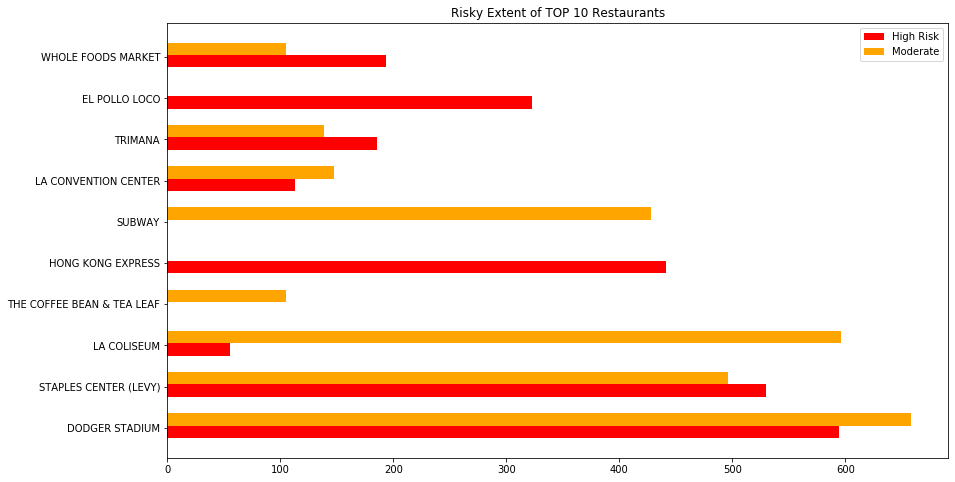

In [39]:
x_axis = np.arange(len(TOP10_risk))
tick_locations = [value+0.1 for value in x_axis]
width=0.3
rect3=plt.barh(x_axis, TOP10_risk.highrisk_number,width,color='red')
rect4=plt.barh(x_axis+width, TOP10_risk.moderaterisk_number,width,color='orange')
plt.yticks(tick_locations, TOP10_risk["facility_name"], rotation="horizontal")
plt.title("Risky Extent of TOP 10 Restaurants")
plt.legend((rect3[0],rect4[0]),("High Risk","Moderate"))
plt.savefig("Risky Extent of TOP 10 Restaurants.jpg", dpi=700, format='png')